In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
mydata = pd.read_csv(r"D:\Program Files (x86)\Project\PythonProject\Python Time Series\PS3\mydata_combined.csv")

In [21]:
X = mydata[["inflation","UNRATE"]].dropna()
var_res = tsa.VAR(endog=X).fit(maxlags=8, trend="c", ic="aic", verbose=True)

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 7, BIC -> 2, FPE -> 7, HQIC ->  6>
Using 7 based on aic criterion


d:\Anaconda\envs\TimeSeriesCode\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [22]:
irf = var_res.irf(periods=40, var_decomp=None)
print(irf.orth_irfs[0, 0, 0])  #[第几期, 哪个变量的变化(response variable), 哪个冲击(impulse)]

0.4093975452486656


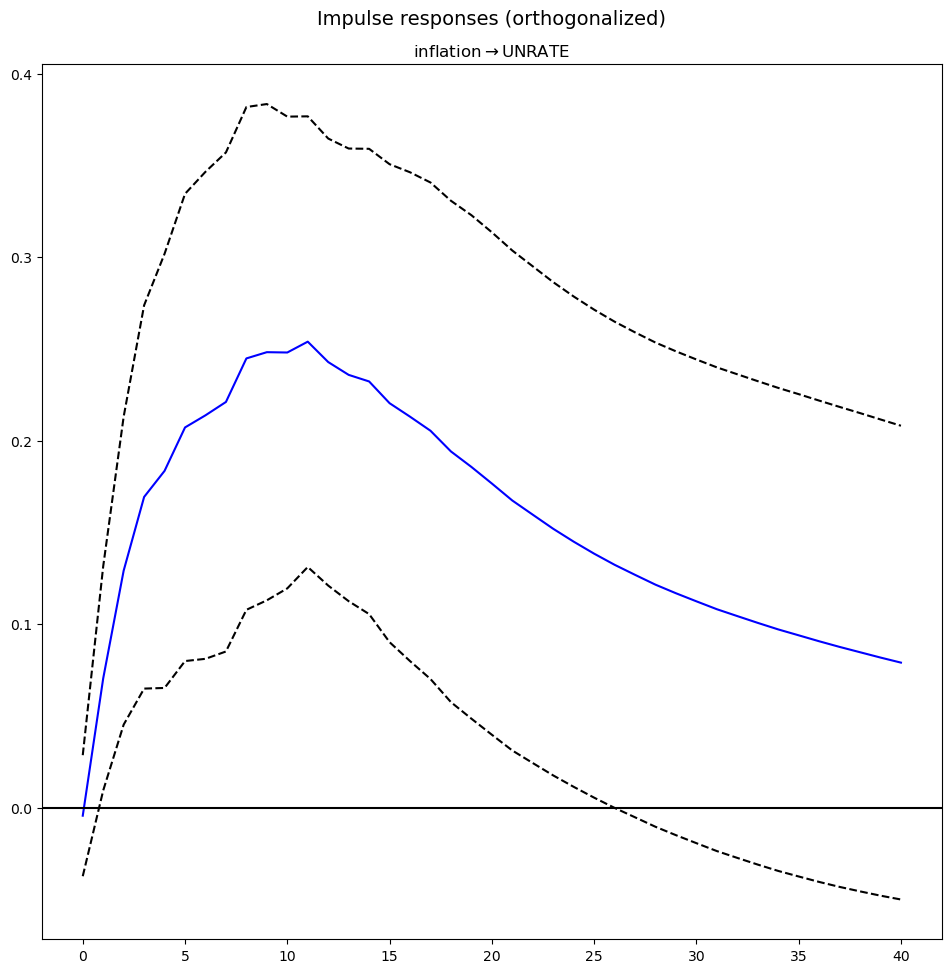

In [23]:
irf_plot = irf.plot(orth=True, impulse="inflation", response="UNRATE")

In [24]:
names = ["inflation", "UNRATE"]
def irf_get(B, period, varname):
    irf = var_res.irf(period, var_decomp=B)
    index = names.index(varname)
    irf_data = irf.orth_irfs[:, index, :]
    return irf_data
import scipy
B0 = scipy.linalg.cholesky(var_res.sigma_u, lower=True)
result = irf_get(B0, 10, "inflation")
print(result)

[[ 0.40939755  0.        ]
 [ 0.59815179 -0.09817374]
 [ 0.6729621  -0.20803804]
 [ 0.77314343 -0.36601788]
 [ 0.63648244 -0.51682102]
 [ 0.53412531 -0.51103112]
 [ 0.52750556 -0.54454196]
 [ 0.45356573 -0.55042075]
 [ 0.45237498 -0.49819506]
 [ 0.45493894 -0.51358957]
 [ 0.40588937 -0.4885752 ]]
